# Setup

In [1]:

from pathlib import Path
import os
import pprint
import pandas as pd
import pygwalker as pyg
import dabl

import sys
from pathlib import Path
#### For Path setup
def setup_project_path():
    """프로젝트 루트 경로를 찾아서 파이썬 경로에 추가"""
    current = Path.cwd()
    while current != current.parent:
        if (current / '.git').exists():
            if str(current) not in sys.path:
                sys.path.append(str(current))
                print(f'Project root found: {current}')
            return current
        current = current.parent
    return None

# 프로젝트 경로 설정
project_root = setup_project_path()
if project_root is None:
    # 프로젝트 루트를 찾지 못했다면 직접 지정
    project_root = Path("D:/dev/upstageailab5-ml-regression-ml_r4")
    if str(project_root) not in sys.path:
        sys.path.append(str(project_root))

#jupyter nbextension enable --py widgetsnbextension

Project root found: d:\dev\upstageailab5-ml-regression-ml_r4


2024-11-08 23:12:10,603 - root - INFO - Initialized Logger.
2024-11-08 23:12:10,605 - root - INFO - Windows platform. Font: ['Malgun Gothic']


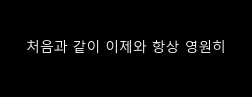

2024-11-08 23:12:13,663 - root - INFO - #### Current workspalce: d:\dev\upstageailab5-ml-regression-ml_r4
2024-11-08 23:12:13,664 - root - INFO - Windows platform. Path: D:\dev\upstageailab5-ml-regression-ml_r4


<Figure size 640x480 with 0 Axes>

In [2]:
from src.logger import Logger
from src.preprocessing import DataPrep
from src.eda import EDA
from src.feature import FeatureEngineer, Clustering, XAI
from src.train import Model
from src.visualization import Visualizer
from src.utils import Utils, PathManager
## memory management
import gc
gc.collect()
########################################################################################################################################
logger_instance = Logger()
logger = logger_instance.logger
utils = Utils(logger)
utils.setup_font_and_path_platform()
current_platform = utils.current_platform
#os.environ['PYTHONPATH'] = r'D:\dev\upstageailab5-ml-regression-ml_r4'
current_path = os.path.abspath(os.path.join(os.getcwd(), '..'))
logger.info(f'#### Current workspalce: {current_path}')
if current_platform == 'Windows':
    base_path = Path(r'D:\dev\upstageailab5-ml-regression-ml_r4')
    logger.info(f'{current_platform} platform. Path: {base_path}')
elif current_platform == 'Darwin':          # Mac
    base_path = Path('/data/ephemeral/home/dev/upstageailab5-ml-regression-ml_r4')
    logger.info(f'{current_platform} platform. Path: {base_path}')
else:
    base_path = Path('/data/ephemeral/home/dev/upstageailab5-ml-regression-ml_r4')    # Linux
    logger.info(f'{current_platform} platform. Path: {base_path}')
########################################################################################################################################


In [3]:
pm = PathManager(base_path)
pm.config

AttributeError: 'PathManager' object has no attribute 'paths'

In [ ]:

# # # 기본 경로 생성
# paths = pm.add_paths({
#     'logs': 'logs',
#     'config': 'config',
#     'output': 'output',
#     'data': 'data'
# })

# # 하위 디렉토리 생성
# model_path = pm.create_subdir('output', 'models')
# report_path =pm.create_subdir('output', 'report')
# prep_data_path = pm.create_subdir('data', 'processed')

# cache_path = pm.create_subdir('data', 'cache')

# # 경로 사용
# log_path = pm.get_path('logs')
# config_path = pm.get_path('config')
pm.get_all_paths()

# path -data  



config ={'base_path':base_path,
        #'out_path':pm.get_path('output'),
        'subway_feature': os.path.join(base_path, 'data','subway_feature.csv'),
        'bus_feature': os.path.join(base_path, 'data','bus_feature.csv'),
        'logger': logger_instance,#logger,
        'random_seed': 2024,
     
        'wandb': {
            'project': 'project-regression_house_price',     # 필수: wandb 프로젝트명
            'entity': 'joon',          # 필수: wandb 사용자/조직명
            'group': 'group-ml4',    # 선택: 실험 그룹명
        }
    }

config.update(loaded_config)
########################################################################################################################################
### Data Prep

path_baseline = os.path.join(prep_data_path, 'df_baseline_prep.csv')
path_auto = os.path.join(prep_data_path, 'df_auto_prep.csv')
########################################################################################################################################
### EDA
path_feat = os.path.join(prep_data_path, 'df_feat.csv')
path_feat_add = os.path.join(prep_data_path, 'df_feat_add.csv')

data_prep = DataPrep(config)

2024-11-08 22:59:19,725 - root - INFO - #### Init Data Prep.. 


In [ ]:
aa=os.path.join(model_path, 'data')
print(aa)


In [ ]:
print()


In [ ]:
pm.get_all_paths()

list_csv = Utils.list_files(prep_path, '.csv')
#pprint.pprint(list_csv)
path_csv = list_csv[6]
print(path_csv)
df= pd.read_csv(path_csv)
df.head()
df.columns
df = utils.remove_unnamed_columns(df)
df.columns

col_id=['is_test','target']
cols_to_select = ['강남여부', '신축여부','건축면적', '주차대수','아파트명','전용면적','계약월','계약년','층','건축년도','도로명','k-단지분류(아파트,주상복합등등)', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)','k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하','경비비관리형태', '세대전기계약방법', '청소비관리형태']

col_feat=df.columns[50:]

In [ ]:


df_selected = df[cols_to_select+list(col_feat)]
df_id=df[col_id]



In [ ]:
df_selected.columns

#Prep Test function

In [ ]:
import pandas as pd
from scipy.stats import entropy
# 숫자형 데이터에 대해 변환
from sklearn.preprocessing import RobustScaler, PowerTransformer

def classify_columns(df, unique_threshold=10, freq_threshold=0.8, entropy_threshold=1.0):
    numeric_cols = []
    categorical_cols = []

    for col in df.columns:
        # Check if column is numeric
        if pd.api.types.is_numeric_dtype(df[col]):
            unique_values = df[col].nunique()
            value_counts = df[col].value_counts(normalize=True)
            col_entropy = entropy(value_counts)

            # Classification logic
            if unique_values <= unique_threshold:
                categorical_cols.append(col)
            elif any(value_counts > freq_threshold):
                categorical_cols.append(col)
            elif col_entropy < entropy_threshold:
                categorical_cols.append(col)
            else:
                numeric_cols.append(col)
        else:
            categorical_cols.append(col)
    print(f'Numeric columns:{len(numeric_cols)} \n{numeric_cols}')
    print(f'Categorical columns:{len(categorical_cols)} \n{categorical_cols}')

    return numeric_cols, categorical_cols


In [ ]:
numeric_cols, categorical_cols =classify_columns(df_selected)



In [ ]:
numeric_cols, categorical_cols = classify_columns(df)


In [ ]:
import pandas as pd
from sklearn.preprocessing import PowerTransformer, RobustScaler
from sklearn.feature_selection import mutual_info_regression
import numpy as np
from scipy.stats import entropy
from tqdm import tqdm

@Utils.timeit
def scale_numeric_features(df):
    """
    Applies Yeo-Johnson or Box-Cox transform based on the values.
    Includes error handling and fallback to RobustScaler.
    """
    print('Scaling numeric features')
    transformed_df = df.copy()
    
    for col in tqdm(df.select_dtypes(include='number').columns):
        try:
            # 상수값 체크
            if df[col].nunique() == 1:
                print(f"Warning: Column '{col}' has constant values. Skipping transformation.")
                continue
                
            # 0이나 음수가 있는지 체크
            if (df[col] > 0).all():
                transformer = PowerTransformer(method='box-cox', standardize=True)
            else:
                transformer = PowerTransformer(method='yeo-johnson', standardize=True)
            
            # 이상치나 무한값 처리
            data = df[[col]].replace([np.inf, -np.inf], np.nan).dropna()
            if len(data) == 0:
                print(f"Warning: Column '{col}' has no valid data after cleaning. Skipping transformation.")
                continue
                
            # 변환 시도
            transformed_values = transformer.fit_transform(data)
            transformed_df.loc[data.index, col] = transformed_values
            
        except Exception as e:
            print(f"Warning: Failed to transform '{col}' using PowerTransformer: {str(e)}")
            print(f"Falling back to RobustScaler for '{col}'")
            try:
                # RobustScaler로 대체
                scaler = RobustScaler()
                transformed_df[col] = scaler.fit_transform(df[[col]])
            except Exception as e2:
                print(f"Warning: Failed to scale '{col}' using RobustScaler: {str(e2)}")
                print(f"Keeping original values for '{col}'")
    
    return transformed_df

@Utils.timeit
def calculate_correlation(df, corr_threshold=0.9):
    """
    Identifies groups of correlated features based on a specified threshold.
    """
    print(f'Calculating correlation with threshold: {corr_threshold}')
    
    # 숫자형 컬럼만 선택
    numeric_df = df.select_dtypes(include='number')
    
    # 상관관계 계산
    corr_matrix = numeric_df.corr().abs()
    correlated_groups = {}

    # NaN 값 처리
    corr_matrix = corr_matrix.fillna(0)

    for i in tqdm(range(len(corr_matrix.columns))):
        for j in range(i):
            if corr_matrix.iloc[i, j] > corr_threshold:
                col1 = corr_matrix.columns[i]
                col2 = corr_matrix.columns[j]
                if col1 not in correlated_groups:
                    correlated_groups[col1] = {col1}
                correlated_groups[col1].add(col2)
    print(f'Found {len(correlated_groups)} groups of correlated features.\n{correlated_groups}')
    return correlated_groups

@Utils.timeit
def select_important_features(df, correlated_groups):
    """
    Selects the most important feature from correlated groups based on mutual information.
    """
    print(f'Selecting important features from {len(correlated_groups)} groups')
    selected_features = set()
    numeric_cols = df.select_dtypes(include='number').columns

    # 타겟 변수 선택 (첫 번째 컬럼 대신 특정 컬럼 지정)
    target_col = numeric_cols[0]  # 또는 특정 컬럼 지정
    
    # Calculate feature importance
    importance_scores = {}
    for col in tqdm(numeric_cols):
        if col == target_col:
            continue
        try:
            # NaN 값 처리
            X = df[[col]].fillna(df[col].mean())
            y = df[target_col].fillna(df[target_col].mean())
            importance_scores[col] = mutual_info_regression(X, y)[0]
        except Exception as e:
            print(f"Warning: Failed to calculate importance for '{col}': {str(e)}")
            importance_scores[col] = 0

    # Select features
    for group in tqdm(correlated_groups.values()):
        group = list(group)
        group = sorted(group, key=lambda x: importance_scores.get(x, 0), reverse=True)
        if group:  # 그룹이 비어있지 않은 경우만
            selected_features.add(group[0])

    # Add uncorrelated features
    uncorrelated_features = set(numeric_cols) - {item for group in correlated_groups.values() for item in group}
    selected_features.update(uncorrelated_features)
    print(f'Found {len(uncorrelated_features)} uncorrelated features: {uncorrelated_features}')
    return list(selected_features)
@Utils.timeit
def preprocess_and_select(df, corr_threshold=0.9):
    """
    Applies scaling, calculates correlation, and selects important features.
    """
    # Step 1: Scale numeric features
    scaled_df = scale_numeric_features(df)

    # Step 2: Calculate correlated groups
    correlated_groups = calculate_correlation(scaled_df, corr_threshold=corr_threshold)

    # Step 3: Select important features
    selected_features = select_important_features(scaled_df, correlated_groups)
    print(f'Selected {len(selected_features)} features: {selected_features}')

    return scaled_df[selected_features]

processed_df = preprocess_and_select(df)

In [ ]:
processed_df.to_csv(os.path.join(prep_path, 'df_fest_selected.csv'), index=False)


In [ ]:
path_data = os.path.join(base_path, 'data')
list_csv_data = Utils.list_files(path_data, '.csv')
print(list_csv_data)

In [ ]:
list_csv_data

# EDA

## PygWalker

In [ ]:
df_name = 'df_feat_selected'
html_path = os.path.join(out_path,f"eda_pygwalker_{df_name}.html")

In [ ]:
# !pip install pygwalker
df_name = 'df_feat'
walker = pyg.walk(
    df_selected,
    spec=os.path.join(out_path,f"eda_pygwalker_{df_name}.json"),    # this json file will save your chart state, you need to click save button in ui mannual when you finish a chart, 'autosave' will be supported in the future.
    kernel_computation=True,          # set `kernel_computation=True`, pygwalker will use duckdb as computing engine, it support you explore bigger dataset(<=100GB).
)



In [ ]:
path = os.path.join(out_path,f"eda_pygwalker_{df_name}.html")
print(path)
walker.to_html(os.path.join(out_path,f"eda_pygwalker_{df_name}.html"))

In [ ]:
df_selected.columns

In [ ]:
html_str = pyg.to_html(df_selected)
with open(path, "w", encoding="utf-8") as f:
    f.write(html_str)

## ydata profiling

In [ ]:
from ydata_profiling import ProfileReport

# 방법 1: 설정 딕셔너리 사용
profile_config = {
    "title": "yData Profiling Report: House Price Prediction",
    "dataset": {
        "description": "House Price Prediction",
        "copyright_holder": "CC0: Public Domain",
        "url": ""
    },
    "correlations": {
        "pearson": {"calculate": True},
        "spearman": {"calculate": True},
        "kendall": {"calculate": False},
        "phi_k": {"calculate": False}
    },
    "plot": {
        "wordcloud": {
            "enabled": True,
            "max_words": 100
        }
    }
}

profile = ProfileReport(df_selected, **profile_config)

# 방법 2: 직접 설정
profile = ProfileReport(
    df,
    title="yData Profiling Report: House Price Prediction",
    dataset={
        "description": "House Price Prediction",
        "copyright_holder": "CC0: Public Domain",
        "url": ""
    },
    correlations={
        "pearson": {"calculate": True},
        "spearman": {"calculate": True},
        "kendall": {"calculate": False},
        "phi_k": {"calculate": False}
    },
    plot={
        "wordcloud": {
            "enabled": True,
            "max_words": 100
        }
    }
)


In [ ]:

# 결과 출력
profile.to_widgets() # ~15 minutes



In [ ]:
profile.to_notebook_iframe()

In [ ]:
profile.to_file( os.path.join(out_path, "y_data_profiling_df_1.html"))
profile

In [ ]:


loaded_config = Utils.load_nested_yaml('config.yaml')
sweep_configs = Utils.get_nested_value(loaded_config, 'sweep_configs')


In [ ]:
sampled_df = df.sample(frac=0.1, random_state=1) 

config={'out_path':os.path.join(base_path, 'output')}
data_prep = DataPrep(config)
df =data_prep.prep_null(df)
df.shape

df = data_prep.prep_inter(df)

In [ ]:

df.columns = df.columns.str.replace('[-/]~', '', regex=True)
df.columns

## DataPrep

In [ ]:
from dataprep.eda import create_report
from dataprep.eda import plot

# EDA 보고서 생성
report = create_report(df)
report.show_browser()

# 특정 컬럼에 대한 상세 분석
plot(df, "column_name")
# 두 변수 간의 관계 분석
plot(df, "column1", "column2")

# # 결측값 처리
# from dataprep.clean import clean_missing
# from dataprep.clean import clean_outliers
# df_cleaned = clean_missing(df, missing_num='mean', missing_cat='mode')
# df_no_outliers = clean_outliers(df, method='zscore')

## Sweetviz

In [ ]:
import sweetviz as sv

# 데이터 로드
df = pd.read_csv('your_dataset.csv')

# 단일 데이터셋 분석
report = sv.analyze(df)
report.show_html('report.html')

# 두 데이터셋 비교 (예: 훈련셋과 테스트셋)
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
compare_report = sv.compare([train_df, "Train"], [test_df, "Test"])
compare_report.show_html('comparison_report.html')

# 타겟 변수 지정 및 특정 설정 적용
report_with_target = sv.analyze(df, target_feat='target_column', 
                                feat_cfg=sv.FeatureConfig(skip=['column_to_skip'], 
                                                         force_text=['column_as_text']))
report_with_target.show_html('report_with_target.html')

In [ ]:
smart_df = SmartDataframe(df)
smart_df.chat('Which column features are critical to predict house price? Convert putative numeric values as float or integer.')


In [ ]:
smart_df.chat('Do Basic EDA and explain it.')

#
# 시군구	번지	본번	부번	아파트명	전용면적(㎡)	계약년월	계약일	층	건축년도	도로명	해제사유발생일	등기신청일자	거래유형	중개사소재지	k-단지분류(아파트,주상복합등등)
# 0	서울특별시 종로구 옥인동		4933.0	307.0	DMC래미안클라시스	71.84	202004	23	40	1998	마들로 646	20200917.0	20230914	중개거래	서울 강북구, 서울 성동구	도시형 생활주택(아파트)
# 1	서울특별시 성북구 성북동	44-8	NaN	NaN	래미안하이리버	15.94	201709	8	20	2022	남부순환로248길 78	NaN	20230915	직거래	서울 광진구, 서울 송파구	None
# 2	서울특별시 용산구 효창동	1312	1293.0	2000.0	None	112.23	201702	4	8	1978	이촌로54길 5	20230325.0	20230413	-	경기 김포시, 서울 강서구	연립주택

In [ ]:
smart_df.chat('Classify Two groups: Categorical or Numeric. Print total number of each group, and each columns. plot basic EDA stuff, based on the sorting (feature importance). Including correlation, heatmap.')

In [ ]:
smart_df.chat('Select important features, and suggest proper scaling method for each different features, for house price (numerica) prediction problem.')

In [ ]:
smart_df.chat('Select important features and tell me why, for house price (numerica) prediction problem.')

In [ ]:
smart_df.chat('Plot distribution and scatter plot altogher. if possible, 3D plot.')

In [ ]:
smart_df.chat('Plot distribution and scatter plot altogher. if possible, 3D plot.')

In [ ]:
smart_df.chat('Plot 3 most import figures.')

In [ ]:
smart_df.chat('What kind of scaling is needed for important features, each?')

In [ ]:
agent = Agent(df)
agent.chat('')



In [ ]:
agent.chat('Plot the histogram')


In [ ]:

from main_baseline import DataPrep, EDA, FeatureEngineer, Model
# import pygwalker as pyg


data_prep = DataPrep(config)
feat_eng = FeatureEngineer(config)
model_instance = Model(config)
df = data_prep.load_data(base_path)



In [ ]:
df = data_prep.prep_null(df)
df = data_prep.prep_inter(df)
# 위 방법으로 전용 면적에 대한 이상치를 제거해보겠습니다.
cols = ['계약년', '전용면적', '강남여부', '구', '건축년도', '좌표X', '좌표Y', '동']
df = data_prep.remove_outliers_iqr(df, '전용면적')
# 이상치 제거 후의 shape은 아래와 같습니다. 약 10만개의 데이터가 제거된 모습을 확인할 수 있습니다.
print(df.shape)
df['is_test'].value_counts()     # 또한, train data만 제거되었습니다.

In [ ]:

walker = pyg.walk(
    df,
    spec="./chart_meta_0.json",    # this json file will save your chart state, you need to click save button in ui mannual when you finish a chart, 'autosave' will be supported in the future.
    kernel_computation=True,          # set `kernel_computation=True`, pygwalker will use duckdb as computing engine, it support you explore bigger dataset(<=100GB).
)

In [ ]:

#### Feat eng
df = feat_eng.prep_feat(df)
df_coor = {'x': '좌표X', 'y': '좌표Y'}
df_subway = data_prep.load_feat_data(os.path.join(base_path, 'data','subway_feature.csv'))
df_bus = data_prep.load_feat_data(os.path.joing(base_path, 'data','bus_feature.csv'))
subway_coor = {'x': '위도', 'y': '경도'}
bus_coor = {'x': 'X좌표', 'y': 'Y좌표'}

df = feat_eng.sum_distances_from_a_to_b(df, df_coor , df_subway, subway_coor, 'subway')
df = feat_eng.sum_distances_from_a_to_b(df, df_coor , df_bus, bus_coor, 'bus')
### split
dt_train, dt_test, continuous_columns_v2, categorical_columns_v2 = feat_eng.split_train_test(df)
dt_train, label_encoders = feat_eng.encode_label(dt_train, dt_test, continuous_columns_v2, categorical_columns_v2)
X_train, X_val, y_train, y_val = feat_eng.split_dataset(dt_train)

prep_data = {'X_train': X_train,
            'X_val': X_val,
            'y_train': y_train,
            'y_val': y_val,
            'continuous_columns': continuous_columns_v2,
            'categorical_columns': categorical_columns_v2
}
out_path_data = model_instance.save_data(prep_data)
# loaded_data = load_data_pkl(out_path_data)
# print(loaded_data)
model, pred = model_instance.model_train(X_train, X_val, y_train, y_val)
feat_eng.select_var(model, X_val, y_val, pred, label_encoders, categorical_columns_v2)
model_instance.inference(dt_test)